# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 8
### Consigna:
En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App. y el 8 de Hayes.

Para ello, realizaremos el punto 4 del TP3.

4) Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

Para una señal x(k)=a1⋅sen(Ω1⋅k)+n(k)

siendo 

Ω1=Ω0+fr⋅2πN


Ω0=π2


y las variables aleatorias definidas por

fr∼U(−12,12)


n∼N(0,σ2)


Evalúe el siguiente estimador de Ω1

Ω^W1=arg maxf{PW^}


basado en el periodograma de Welch evaluado en el TP3. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de Ω1

Ω^X1=arg maxf{PX^}


Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del piso de ruido impuesto por n(k).

Ayuda: Puede utilizar el módulo de análisis espectral Spectrum donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

Bonus
Implementar el periodograma de Welch


In [1]:
"""
Created on Wed Oct 27 17:34:58 2021

@author: Ema
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift
import matplotlib.patches as mpatches
from pandas import DataFrame
from IPython.display import HTML

In [2]:
#######################################################################################################################
#%% Inicio de la simulación
#######################################################################################################################
plt.close('all')

# Datos generales de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

figura=0
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

t=np.arange(0,1,ts)
f=np.arange(0,fs,df)
####################
###Armo la se;al
###Pruebo con un noise ratio bajo a ver si los resultados salen bonitos
####################
a1=1
#calculo el ratio con SNR=10*log(a1/noise_power)
SNR=np.array([3,10])
noise_power=np.zeros_like(SNR)
noise=np.zeros_like(SNR)
noise_power=a1/(10**(SNR/10))

omega_0=np.pi/2
fr=np.random.uniform(low=-1/2, high=1/2, size=200)
omega_1=omega_0+fr*2*np.pi/N

In [3]:
## como uno es de (200,1) y el otro es de (1000,1) no puedo hacer el producto
##cambio los ejes para que sea (200,1)*(1,1000)
####################
###Primer experimento con 3dB
###Ya que hacer una matriz 3D me la complica al pedo
####################
noise_0=np.random.normal(loc=0,scale=np.sqrt(noise_power[0]),size=(1000,200))

var=np.var(noise)
mean=np.mean(noise)
x_0=a1*np.sin(2*np.pi*omega_1.reshape(1,200)*(fs/(2*np.pi))*t.reshape(1000,1)) + noise_0
#plt.plot(t,x[:,1])

In [4]:
####################
###Segundo experimento con 10dB
###Ya que hacer una matriz 3D me la complica al pedo
####################
noise_1=np.random.normal(loc=0,scale=np.sqrt(noise_power[1]),size=(1000,200))

var=np.var(noise)
mean=np.mean(noise)
x_1=a1*np.sin(2*np.pi*omega_1.reshape(1,200)*(fs/(2*np.pi))*t.reshape(1000,1)) + noise_1

(0.24, 0.26)

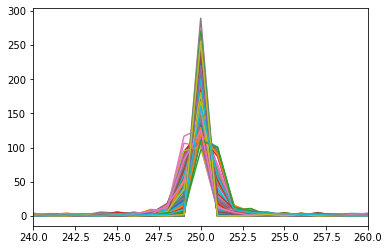

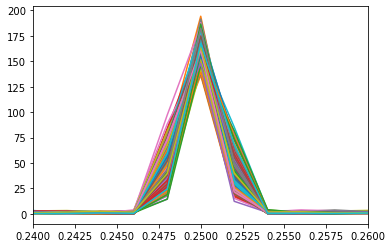

In [5]:
################################
###Calculo del periodograma con 3 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0,axis=0)))**2


#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_0,nperseg=500,axis=0)

###Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)

plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(0.240,0.260)

(0.24, 0.26)

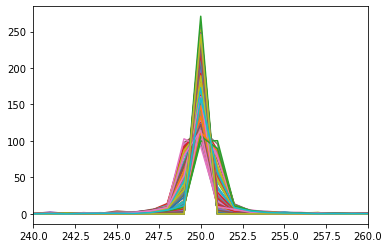

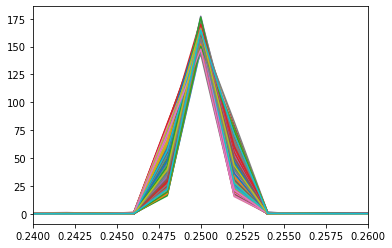

In [6]:
################################
###Calculo del periodograma con 10 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,nperseg=500,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(0.240,0.260)


Conclusiones hasta aca:<br>
Los graficos semi log no nos permiten distinguir cual de los dos experimientos es el mas ruidoso pero son escalas mas razonables.<br>
El metodo de welch es mucho mejor al momento de definir en que frecuencia esta nuestra señal comparado con nuestro periodograma normal que dispersa mas la energia.<br>
Como adicional le tiro un zero padding a las señales solo para revisar si hace algo divertido.<br>
Esto ultimo no seria una conclusion xD

(0.24, 0.26)

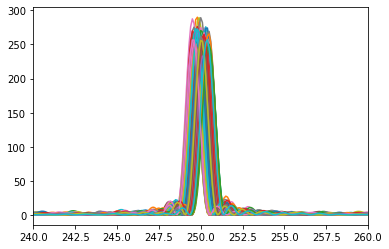

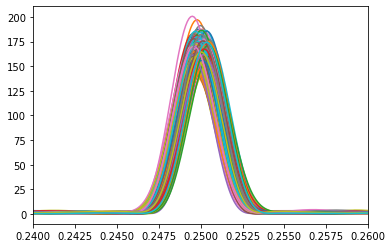

In [7]:
################################
###Calculo del periodograma con 3 dB y zero padding
################################
#Creo un nuevo vector f para los calculos
f_padded=np.arange(0,fs,fs/(10*N))

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0,n=10*N,axis=0)))**2


#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_0,nperseg=500,nfft=10*N,axis=0)

###Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo
#plt.semilogy(f,Pp)

plt.plot(f_padded,Pp)
plt.xlim(240,260)

plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(0.240,0.260)

(0.24, 0.26)

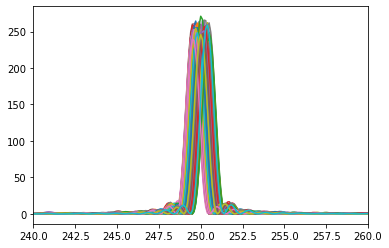

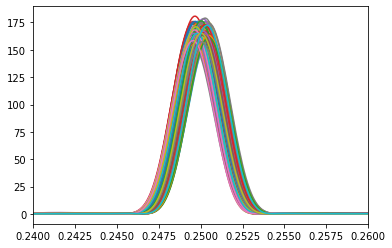

In [8]:
################################
###Calculo del periodograma con 10 dB y zero padding
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,n=10*N,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,nperseg=500,nfft=10*N,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f_padded,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(0.240,0.260)

Conclusion 2 jejeje<br>
El zero padding suavizo mi salida ya que ahora tiene mas muestras al momento de ventanear que no aportan potencia ya que contienen zeros.<br>
Y me hace mas bonitos los graficos :P<br>